## Question 3

## Importing Required Libraries

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import random
from sklearn.cluster import KMeans

## Data Generation

In [221]:
x_i = []
x_j = []
data_label =[]
for i in range(0,21):
    x= -2+(0.2*i)
    x = round(x,1)
    x_i.append(x)
    x_j.append(x)
data_label =  [[x,y] for x in x_i for y in x_j]
# print(data_label)
for i in range(len(data_label)):
    x = data_label[i]
    x_1 = x[0]
    x_2 = x[1]
    if(((x_1**2)+(x_2**2))<=1):
        data_label[i].append(+1)
    else:
        data_label[i].append(-1)
data_label = np.array(data_label)

# Randomly Shuffling the Data
np.random.shuffle(data_label)
print("Data",data_label)
X_data = data_label[:,[0,1]]
y_data = data_label[:,[2]]

Data [[ 0.2  1.4 -1. ]
 [-1.   0.4 -1. ]
 [ 2.  -0.6 -1. ]
 ...
 [-0.6 -2.  -1. ]
 [-1.6 -1.6 -1. ]
 [ 0.8 -1.2 -1. ]]


## Splitting the data into Train and Test Data

In [222]:
index = int(0.8 * len(X_data))
X_train, X_test = X_data[:index], X_data[index:]
y_train, y_test = y_data[:index], y_data[index:]
print("X_train",X_train.shape)
print("X_test",X_test.shape)

X_train (352, 2)
X_test (89, 2)


In [223]:
class rbf():
    def __init__(self,hidden_n,centers,sigma,KMeans = False):
        self.sigma = sigma
        self.weights = None
        self.centers = centers
        self.Hidden_Neurons = hidden_n
        self.KMeans = KMeans

    def gaussiankernel(self, x, v):
        return np.exp((-1 / (2*self.sigma**2))*np.linalg.norm(x-v)**2)

    def random(self, x):
        r = np.random.choice(len(x),self.centers)
        centers = x[r]
        return centers
        
    def G(self,x):
        v = np.zeros((len(x),self.Hidden_Neurons))
        for i in range(len(x)):
            for j in range(len(self.centers)):
                v[i][j] = self.gaussiankernel(x[i],self.centers[j])
        return v

    
    def fit(self,x,y):
        if(self.KMeans==False):
            self.centers = self.random(x)
        else:
            self.centers=KMeans(n_clusters=150, random_state=0).fit(x)
            self.centers=self.centers.cluster_centers_
        g = self.G(x)
        g_inv = np.linalg.pinv(g)
        self.weights = np.dot(g_inv,y)  
    
    def predict(self,x):
        pred = np.dot(self.G(x), self.weights)
        pred=self.signum(pred)
        return pred
        
    def signum(self,d):
        return np.sign(d)
    
    def accuracy(self, y_p, y):
        s = 0
        for i in range(len(y_p)):
            if (y_p[i] == y[i]):
                s += 1
        accuracy = s / len(y_p)
        return accuracy
    
    def MeanError(self,y_p,y):
        mse=np.square(np.subtract(y_p,y)).mean() 
        return mse 

## 1. Training the RBF model with all the datapoints

In this case all the input data points are passed as centers to the Hidden Layer.

Training the model with different sigma values ranging from 0.05 to 20. The Accuracies and Mean Squared Errors for different sigma values were calculated and plots of sigma vs accuracies and sigma vs Errors were plotted to observe the variations.
The value of Sigma which generated the Maximum Accuracy and least Error were reported.



In [235]:
%%time
#List of Different Sigma Values
s = [0.05,0.1,0.5,1,1.5,2,5,10,12,15,20]
accuracy = []
mse = []
for i in s:
    obj = rbf(len(X_train),len(X_train),i)
    obj.fit(X_train,y_train)
    y_pred = obj.predict(X_test)
    a = obj.accuracy(y_pred,y_test)*100
    accuracy.append(a)
    m = obj.MeanError(y_pred,y_test)
    mse.append(m)
    print("Sigma",i,"Accuracy",np.round(a,2),"Mean Squared Error",np.round(m,2))

Sigma 0.05 Accuracy 97.75 Mean Squared Error 0.09
Sigma 0.1 Accuracy 96.63 Mean Squared Error 0.13
Sigma 0.5 Accuracy 95.51 Mean Squared Error 0.18
Sigma 1 Accuracy 95.51 Mean Squared Error 0.18
Sigma 1.5 Accuracy 98.88 Mean Squared Error 0.04
Sigma 2 Accuracy 98.88 Mean Squared Error 0.04
Sigma 5 Accuracy 97.75 Mean Squared Error 0.09
Sigma 10 Accuracy 96.63 Mean Squared Error 0.13
Sigma 12 Accuracy 97.75 Mean Squared Error 0.09
Sigma 15 Accuracy 96.63 Mean Squared Error 0.13
Sigma 20 Accuracy 96.63 Mean Squared Error 0.13
CPU times: user 30.2 s, sys: 834 ms, total: 31 s
Wall time: 25.9 s


### Plot of Sigma values Vs Accuracies

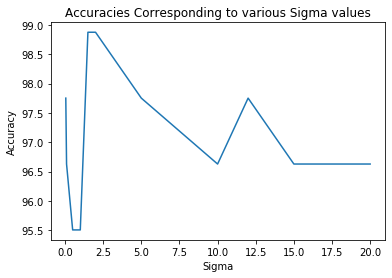

In [236]:
plt.plot(s,accuracy)
plt.xlabel("Sigma")
plt.ylabel("Accuracy")
plt.title("Accuracies Corresponding to various Sigma values")
plt.show()

### Plot of Sigma Vs Mean Squared Errors

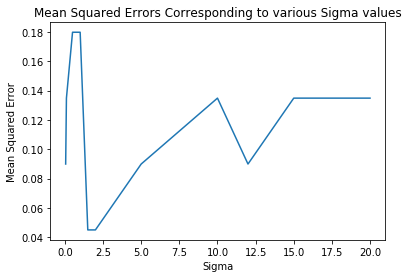

In [237]:
plt.plot(s,mse)
plt.xlabel("Sigma")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Errors Corresponding to various Sigma values")
plt.show()

### Reporting the sigma which gave Maximum accuracy and Least Error

### Maximum Accuracy: 98.88
### Least Error: 0.04
### Corresponding Sigma: 1.5
### Time: 25.9 s



## 2. Performing the design of the RBF NN, using this time only 150 centers, choosing the centers using two approaches:

### a. Randomly selecting 150 centers from the input data and training for the best sigmas from approach 1

In [246]:
%%time
s=1.5
obj = rbf(len(X_train),150,s)
obj.fit(X_train,y_train)
y_pred = obj.predict(X_test)
accuracy = obj.accuracy(y_pred,y_test)*100
mse = obj.MeanError(y_pred,y_test)
print("Accuracy",np.round(accuracy,2),"Mean Squared Error",np.round(mse,2),"Sigma",s)

Accuracy 98.88 Mean Squared Error 0.04 Sigma 1.5
CPU times: user 1.23 s, sys: 73.1 ms, total: 1.3 s
Wall time: 1.02 s


### Accuracy: 98.88  
### Error: 0.04  
### Sigma: 1.5
### Time: 1.02 s

### b. Using K-Means algorithm to find the centers 

In [247]:
%%time
s = 1.5
obj = rbf(len(X_train),150,1.5,True)
obj.fit(X_train,y_train)
y_pred = obj.predict(X_test)
accuracy = obj.accuracy(y_pred,y_test)*100
mse = obj.MeanError(y_pred,y_test)
print("Accuracy",np.round(accuracy,2),"Mean Squared Error",np.round(mse,2),"Sigma",s)

Accuracy 98.88 Mean Squared Error 0.04 Sigma 1.5
CPU times: user 2.53 s, sys: 111 ms, total: 2.64 s
Wall time: 1.62 s


### Accuracy: 98.88
### Mean Squared Error: 0.04
### Sigma: 1.5
### Time: 1.62 s

## Observations from the runs:

-- Generally as the spread increases the forecasting of the data reduces.Considering this I chose 1.5 as the sigma value among all the sigmas that returned the highest accuracies and I used this as the sigma value for the approach two when we randomly choose 150 datapoints as centers.  
-- For the second approach I also tried different sigma values, here I observed that the best accuracy obtained was still for the same sigma value. This deduces that the spread parameter is not dependent on the number of centers chosen.  
-- We can also observe that as the number of centers reduced in the second approach, the accuracy also reduced.   
-- Considering time taken for the computation, in the first approach the time taken is greater than that for 150 centers because choosing 150 centers randomly is faster even when compared to computing 150 centers using KMeans Clustering.